In [ ]:
# !pip install -U ydata_profiling

# Assignment

### imports

In [2]:
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns


%matplotlib inline

from IPython.display import Image

# Task 1

Problem 1.

1. Load the moons dataset: from sklearn.datasets import make_moons
- Create 200 samples with noise=0.1
- Split into training (70%) and testing (30%) sets


2. Train two classifiers:
- LogisticRegression
- DecisionTreeClassifier

3. Calculate accuracy for both models on the test set
- Plot the decision boundaries for both classifiers


* Bonus

Implement one technique to improve the performance of either model

# Moon dataset

## Importing and spliting the data

In [3]:
from sklearn.datasets import make_moons

In [4]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

In [5]:
X[:5]

array([[-1.04942573,  0.08444263],
       [ 0.92281755,  0.45748851],
       [ 0.65678659,  0.69959669],
       [ 1.1889402 , -0.38652807],
       [ 0.28926455, -0.13774489]])

In [6]:
y[:5]

array([0, 0, 0, 1, 1])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model training

### LogisticRegression

In [8]:
log = LogisticRegression()
log.fit(X_train, y_train)

y_pred_l = log.predict(X_test)

### DecisionTreeClassifier

In [9]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_t = tree.predict(X_test)

## Results

In [10]:
l_accuracy = accuracy_score(y_test, y_pred_l)
t_accuracy = accuracy_score(y_test, y_pred_t)

print('Accuracy')
print(f'Logistic Regression: {round(l_accuracy, 2)}')
print(f'Decision Tree: {round(t_accuracy, 2)}')

Accuracy
Logistic Regression: 0.87
Decision Tree: 0.98


### Logistic Regression

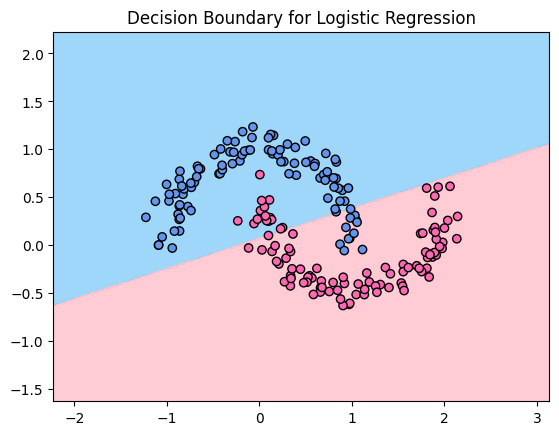

In [11]:
# extracting min and max values of each feature
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# grid for plotting values in between min and max of each feature
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# decision boundary
Z = log.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot
plt.contourf(xx, yy, Z, alpha=0.8,
             cmap=ListedColormap(('lightskyblue', 'pink')))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o',
            cmap=ListedColormap(('cornflowerblue', 'hotpink')))
plt.title('Decision Boundary for Logistic Regression')
plt.show()

### Decision Tree Classifier

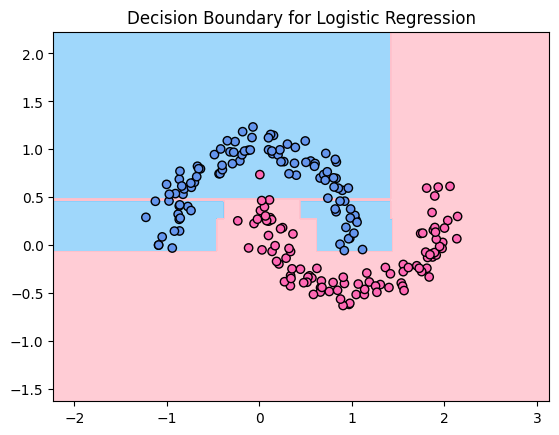

In [12]:
# decision boundary
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot
plt.contourf(xx, yy, Z, alpha=0.8,
             cmap=ListedColormap(('lightskyblue', 'pink')))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o',
            cmap=ListedColormap(('cornflowerblue', 'hotpink')))
plt.title('Decision Boundary for Logistic Regression')
plt.show()

## Implementing new technique on Logistic Regression

I'm gonna use StandardScaler()

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log = LogisticRegression()
log.fit(X_train_scaled, y_train)

y_pred = log.predict(X_test_scaled)

l2_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression')
print(f'Before Scaler: {round(l_accuracy, 3)}')
print(f'After Scaler: {round(l2_accuracy, 3)}')

Accuracy of Logistic Regression
Before Scaler: 0.867
After Scaler: 0.883


# Task 2

Problem 2. Train logistic regression model on the wine classification dataset.
- First, split the dataset into train and test. What is the accuracy of the obtained model? Confusion matrix?

# Wine dataset

## Importing and exploring the dataset

In [14]:
from sklearn.datasets import load_wine
data = load_wine()

In [15]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

In [16]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [17]:
df.shape

(178, 14)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

In [20]:
# profile = ProfileReport(df, title="Wine Dataset Report")

In [21]:
# gotta wait a little bit
# profile

## Preparing the data

In [22]:
# features
X = df.drop(columns=['Target'])
# target variable
y = df['Target']

In [23]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [24]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model training

In [27]:
log = LogisticRegression()
log.fit(X_train, y_train)

y_pred_l = log.predict(X_test)

## Results

In [30]:
l_accuracy = round(accuracy_score(y_test, y_pred_l), 2)

print('Accuracy')
print(f'Logistic Regression: {l_accuracy}')

Accuracy
Logistic Regression: 1.0


As we can see the accuracy is 100%, I think it's because of the small dataset probably.

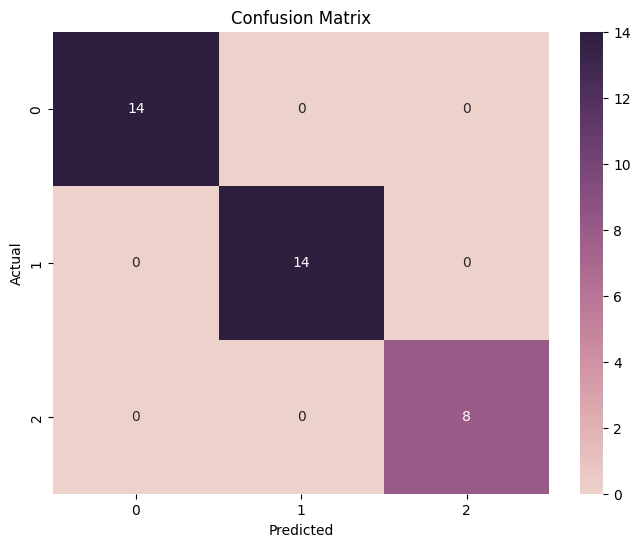

In [31]:
cm = confusion_matrix(y_test, y_pred_l)

custom_cmap = sns.cubehelix_palette(as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=custom_cmap)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Task 3

Problem 3 (theoretical). Don't chatgpt, use your own brain and wording, thank you. You can google if you need to, though.
- Imagine we are dealing with a binary classification task and we have a class distribution of 90%/10%, meaning a very unbalanced set of samples.
    - Out of all the metrics we learned, what do you think the best classification metric for this task would be? Precision-recall? Accuracy? F1-score? ROC AUC? Something else?
    - Share your thoughts on the topic, and express yourself on the *accuracy* metric here. Would it be beneficial, not at all?

At first, i wanted to say that the answer would be ROC AUC, but after doing some research, i found out that the Precision-recall may be prefered more. The difference between these two metrics is that precision denominator contains the false positives while FPR denominator contains the true negatives. Precision is way better for imbalanced data because it doesn't depend on a large number of negative samples. It's important for cases like detecting rare events, like fraud or rare diseases. That's because it measures the number of true positives out of the samples predicted as positives.Also precision and recall are separate metrics, and they don't have their own accuracy.

We can calculate them by using this formula:
- Precision = True positive / True positive + False Positive
- Recall = True positive / True positive False Negative

Accuracy is good for balanced data, but for imbalanced data accuracy score can be very high because it will predict all samples as belonging to the more common class.

Sources:
- https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/
- https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba
- https://juandelacalle.medium.com/how-and-why-i-switched-from-the-roc-curve-to-the-precision-recall-curve-to-analyze-my-imbalanced-6171da91c6b8

Thanks for attention!